In [2]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/sherli001/.conda/envs/singlecell/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] hgu219.db_3.2.3       org.Hs.eg.db_3.14.0   forcats_0.5.2        
 [4] stringr_1.5.0         dplyr_1.1.0           purrr_1.0.1          
 [7] readr_2.1.3           tidyr_1.3.0           tibble_3.1.7         
[10] ggplot2_3.3.6         tidyverse_1.3.2       AnnotationDbi_1.56.2 


In [1]:
library(WGCNA)
library(AnnotationDbi)
library(tidyverse)
library(ggplot2)
options(stringsAsFactors = FALSE)

library(hgu219.db)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Warning message:
“package ‘AnnotationDbi’ was built under R version 4.1.3”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


In [3]:
load(file = "pairwise_RData_files/20230419_pairwise_WGCNA_ADNI_allSubjects_gender_rin_phase_corrected-01-dataInput.RData")
load(file = "pairwise_RData_files/20230419_CN_AD_gender_rin_phase_corrected-02-networkConstruction-stepByStep.RData")
load(file = "pairwise_RData_files/20230419_datExpr_CN_AD_gender_rin_phase_corrected_selectHVGs.RData")

In [4]:
ls()

[1] "datExpr_CN_AD_gender_rin_phase_corrected"   
 [2] "datExpr_CN_AD_selectHVGs"                   
 [3] "datExpr_CN_MCI_gender_rin_phase_corrected"  
 [4] "datExpr_MCI_AD_gender_rin_phase_corrected"  
 [5] "datTraits_CN_AD_gender_rin_phase_corrected" 
 [6] "datTraits_CN_MCI_gender_rin_phase_corrected"
 [7] "datTraits_MCI_AD_gender_rin_phase_corrected"
 [8] "geneTree_CN_AD_gender_rin_phase"            
 [9] "MEs_CN_AD_gender_rin_phase"                 
[10] "moduleColors_CN_AD_gender_rin_phase"        
[11] "moduleLabels_CN_AD_gender_rin_phase"

## Quantifying module-trait associations

In [7]:
# Define numbers of genes and samples
nGenes_CN_AD <- ncol(datExpr_CN_AD_selectHVGs)
nSamples_CN_AD <- nrow(datExpr_CN_AD_selectHVGs)

# Recalculate MEs with color labels
MEs0_CN_AD = moduleEigengenes(datExpr_CN_AD_selectHVGs, moduleColors_CN_AD_gender_rin_phase)$eigengenes
MEs_CN_AD = orderMEs(MEs0_CN_AD)
moduleTraitCor_CN_AD = cor(MEs_CN_AD, datTraits_CN_AD_gender_rin_phase_corrected, use = "p");
moduleTraitPvalue_CN_AD = corPvalueStudent(moduleTraitCor_CN_AD, nSamples_CN_AD);

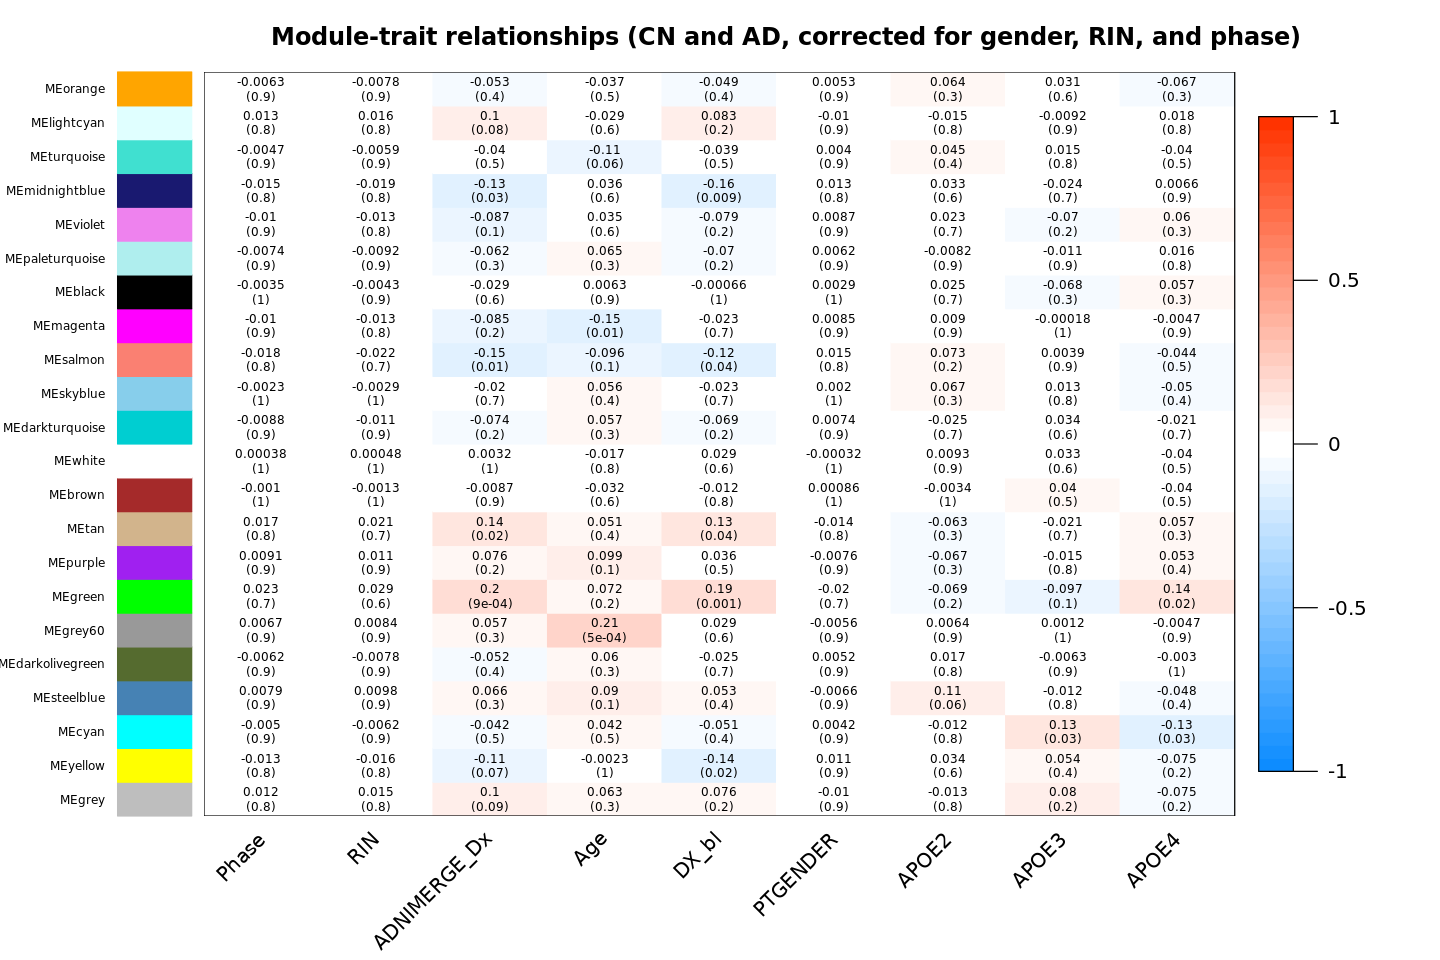

In [9]:
# sizeGrWindow(12,9)
options(repr.plot.width = 12, repr.plot.height = 8)
# Will display correlations and their p-values
textMatrix_CN_AD = paste(signif(moduleTraitCor_CN_AD, 2), "\n(",
                                        signif(moduleTraitPvalue_CN_AD, 1), ")", sep = "");
dim(textMatrix_CN_AD) = dim(moduleTraitCor_CN_AD)
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor_CN_AD,
               xLabels = names(datTraits_CN_AD_gender_rin_phase_corrected),
               yLabels = names(MEs_CN_AD),
               ySymbols = names(MEs_CN_AD),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix_CN_AD,
               setStdMargins = FALSE,
               cex.text = 0.6,
               cex.lab.y = 0.6,
               zlim = c(-1,1),
               main = paste("Module-trait relationships (CN and AD, corrected for gender, RIN, and phase)"))

In [11]:
pdf(file = "pairwise_plots/CN_AD_moduleTraitCor.pdf", 
    width = 12, height = 9)

textMatrix_CN_AD = paste(signif(moduleTraitCor_CN_AD, 2), "\n(",
                                        signif(moduleTraitPvalue_CN_AD, 1), ")", sep = "");
dim(textMatrix_CN_AD) = dim(moduleTraitCor_CN_AD)
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor_CN_AD,
               xLabels = names(datTraits_CN_AD_gender_rin_phase_corrected),
               yLabels = names(MEs_CN_AD),
               ySymbols = names(MEs_CN_AD),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix_CN_AD,
               setStdMargins = FALSE,
               cex.text = 0.6,
               cex.lab.y = 0.6,
               zlim = c(-1,1),
               main = paste("Module-trait relationships (CN and AD, corrected for gender, RIN, and phase)"))

dev.off()

png 
  2

## Gene relationship to trait and important modules

In [12]:
# Define variable diagnosis containing diagnosis column of datTrait
diagnosis  <- as.data.frame(datTraits_CN_AD_gender_rin_phase_corrected$ADNIMERGE_Dx)
names(diagnosis) <- "diagnosis"

In [13]:
# names (colors) of the modules
modNames_CN_AD = substring(names(MEs_CN_AD), 3)
modNames_CN_AD

[1] "orange"         "lightcyan"      "turquoise"      "midnightblue"  
 [5] "violet"         "paleturquoise"  "black"          "magenta"       
 [9] "salmon"         "skyblue"        "darkturquoise"  "white"         
[13] "brown"          "tan"            "purple"         "green"         
[17] "grey60"         "darkolivegreen" "steelblue"      "cyan"          
[21] "yellow"         "grey"

In [14]:
geneModuleMembership_CN_AD <- as.data.frame(cor(datExpr_CN_AD_selectHVGs, 
                                                MEs_CN_AD, use = "p"))
MMPvalue_CN_AD <- as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership_CN_AD), 
                                                 nSamples_CN_AD))

names(geneModuleMembership_CN_AD) = paste("MM", modNames_CN_AD, sep="");
names(MMPvalue_CN_AD) = paste("p.MM", modNames_CN_AD, sep="");

In [15]:
geneTraitSignificance_CN_AD.diagnosis = as.data.frame(cor(datExpr_CN_AD_selectHVGs, diagnosis, use = "p"));

GSPvalue_CN_AD.diagnosis = as.data.frame(
    corPvalueStudent(as.matrix(geneTraitSignificance_CN_AD.diagnosis), nSamples_CN_AD));

names(geneTraitSignificance_CN_AD.diagnosis) = paste("GS.", names(diagnosis), sep="");
names(GSPvalue_CN_AD.diagnosis) = paste("p.GS.", names(diagnosis), sep="");

In [16]:
# convert probe names to gene symbols
vector_datExpr_CN_AD_geneSymbols <- rep(0, length = ncol(datExpr_CN_AD_selectHVGs))

vector_datExpr_CN_AD_geneSymbols <- AnnotationDbi::mapIds(hgu219.db,
                                                          keys = datExpr_CN_AD_selectHVGs %>% colnames,
                                                          column = "SYMBOL",
                                                          keytype = "PROBEID",
                                                          multiVals = "first")

'select()' returned 1:many mapping between keys and columns



In [17]:
df_datExpr_CN_AD_geneSymbols <- data.frame(vector_datExpr_CN_AD_geneSymbols)
colnames(df_datExpr_CN_AD_geneSymbols) <- c("geneSymbol")

df_datExpr_CN_AD_geneSymbols %>% head

,geneSymbol
,<chr>
11756083_x_at,HLA-DQA1
11732801_at,SIRPB1
11755998_x_at,HLA-DRB4
11760799_x_at,HLA-DPB1
11732800_a_at,SIRPB1
11752660_a_at,SIRPB1


In [19]:
# Create the starting data frame
geneInfo0_CN_AD_diagnosis = data.frame(geneProbe = rownames(df_datExpr_CN_AD_geneSymbols),
                                       geneSymbol = df_datExpr_CN_AD_geneSymbols$geneSymbol,
                                       moduleColor = moduleColors_CN_AD_gender_rin_phase,
                                       geneTraitSignificance_CN_AD.diagnosis,
                                       GSPvalue_CN_AD.diagnosis)

# Order modules by their significance for weight
modOrder_CN_AD_diagnosis = order(-abs(cor(MEs_CN_AD, diagnosis, use = "p")));
# Add module membership information in the chosen order
for (mod in 1:ncol(geneModuleMembership_CN_AD))
{
    oldNames_diagnosis = names(geneInfo0_CN_AD_diagnosis)
    geneInfo0_CN_AD_diagnosis = data.frame(geneInfo0_CN_AD_diagnosis, geneModuleMembership_CN_AD[, modOrder_CN_AD_diagnosis[mod]],
                                     MMPvalue_CN_AD[, modOrder_CN_AD_diagnosis[mod]]);
    names(geneInfo0_CN_AD_diagnosis) = c(oldNames_diagnosis, paste("MM.", modNames_CN_AD[modOrder_CN_AD_diagnosis[mod]], sep=""),
                                   paste("p.MM.", modNames_CN_AD[modOrder_CN_AD_diagnosis[mod]], sep=""))
}
# Order the genes in the geneInfo variable first by module color, then by geneTraitSignificance
geneOrder_CN_AD_diagnosis = order(geneInfo0_CN_AD_diagnosis$moduleColor, -abs(geneInfo0_CN_AD_diagnosis$GS.diagnosis));
geneInfo_CN_AD_diagnosis = geneInfo0_CN_AD_diagnosis[geneOrder_CN_AD_diagnosis, ]

In [20]:
geneInfo_CN_AD_diagnosis %>% head

,geneProbe,geneSymbol,moduleColor,GS.diagnosis,p.GS.diagnosis,MM.green,p.MM.green,MM.salmon,p.MM.salmon,MM.tan,⋯,MM.turquoise,p.MM.turquoise,MM.black,p.MM.black,MM.skyblue,p.MM.skyblue,MM.brown,p.MM.brown,MM.white,p.MM.white
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11740265_a_at,11740265_a_at,VPS9D1,black,0.1990464,0.0007754603,0.57774999,1.653146e-26,-0.1124119,5.938773e-02,0.1512639,⋯,-0.56144980,7.980064e-25,0.5294665,8.882577e-22,0.05036251,0.39950326,-0.2447709,3.245349e-05,0.008207086,0.8908643653
11724200_a_at,11724200_a_at,PYGM,black,0.1875332,0.0015596929,0.60187976,3.515422e-29,-0.0712384,2.330659e-01,0.1382445,⋯,-0.47317782,3.858825e-17,0.5472869,1.956032e-23,0.02290173,0.70177352,-0.2685130,4.800249e-06,0.025388257,0.6711894664
11743698_at,11743698_at,EDEM3,black,0.1855133,0.0017560425,-0.11126155,6.205571e-02,-0.2376581,5.550770e-05,0.2188325,⋯,0.54189990,6.349570e-23,-0.7453652,3.140166e-51,-0.15086904,0.01118691,0.1928005,1.138437e-03,-0.078913733,0.1863805677
11733812_a_at,11733812_a_at,SLC25A17,black,-0.1776888,0.0027488230,-0.04557474,4.458649e-01,0.1676826,4.752007e-03,-0.2060237,⋯,-0.06451725,2.802571e-01,0.3426711,3.447721e-09,0.05657445,0.34385020,-0.1071039,7.253254e-02,0.090287915,0.1303944414
11739739_a_at,11739739_a_at,IL21R,black,-0.1761406,0.0029973966,-0.16097669,6.749843e-03,0.4014766,2.398914e-12,-0.3992660,⋯,-0.21927550,2.063019e-04,0.6688306,6.244835e-38,0.10344452,0.08290601,-0.1595321,7.267893e-03,0.197629564,0.0008468905
11736070_at,11736070_at,C8orf33,black,-0.1737947,0.0034130478,-0.27096025,3.900051e-06,0.3012867,2.505051e-07,-0.5568749,⋯,-0.03915192,5.125944e-01,0.5861457,2.059425e-27,0.10916322,0.06717612,-0.2673166,5.309273e-06,0.088641168,0.1375833007


In [21]:
write.csv(geneInfo_CN_AD_diagnosis, file = "pairwise_csv_files/20230419_geneInfo_CN_AD_gender_rin_phase_corrected.csv")

In [22]:
entrezCodes_CN_AD <- AnnotationDbi::mapIds(hgu219.db,
                                           keys = datExpr_CN_AD_selectHVGs %>% colnames,
                                           column = "ENTREZID",
                                           keytype = "PROBEID",
                                           multiVals = "first")

'select()' returned 1:many mapping between keys and columns



In [23]:
GOenr_CN_AD_diagnosis = GOenrichmentAnalysis(moduleColors_CN_AD_gender_rin_phase, entrezCodes_CN_AD, organism = "human", nBestP = 10);

Warning message in GOenrichmentAnalysis(moduleColors_CN_AD_gender_rin_phase, entrezCodes_CN_AD, :
“This function is deprecated and will be removed in the near future. 
We suggest using the replacement function enrichmentAnalysis 
in R package anRichment, available from the following URL:
https://labs.genetics.ucla.edu/horvath/htdocs/CoexpressionNetwork/GeneAnnotation/”
Loading required package: GO.db



 GOenrichmentAnalysis: loading annotation data...
  ..of the 10088  Entrez identifiers submitted, 9784 are mapped in current GO categories.
  ..will use 9784 background genes for enrichment calculations.
  ..preparing term lists (this may take a while).. 
  ..working on label set 1 ..
    ..calculating enrichments (this may also take a while)..
    ..putting together terms with highest enrichment significance..


In [24]:
tab_CN_AD_diagnosis = GOenr_CN_AD_diagnosis$bestPTerms[[4]]$enrichment

In [25]:
tab_CN_AD_diagnosis %>% head

,module,modSize,bkgrModSize,rank,enrichmentP,BonferoniP,nModGenesInTerm,fracOfBkgrModSize,fracOfBkgrTermSize,bkgrTermSize,termID,termOntology,termName,termDefinition
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
GO:0070530,black,602,586,1,0.0002146909,1,6,0.01023891,0.3750000,16,GO:0070530,MF,K63-linked polyubiquitin modification-dependent protein binding,Binding to a protein upon poly-ubiquitination formed by linkages between lysine residues at position 63 in the target protein.
GO:0032543,black,602,586,2,0.0004776407,1,9,0.01535836,0.2250000,40,GO:0032543,BP,mitochondrial translation,"The chemical reactions and pathways resulting in the formation of a protein in a mitochondrion. This is a ribosome-mediated process in which the information in messenger RNA (mRNA) is used to specify the sequence of amino acids in the protein; the mitochondrion has its own ribosomes and transfer RNAs, and uses a genetic code that differs from the nuclear code."
GO:0090502,black,602,586,3,0.0008837692,1,10,0.01706485,0.1923077,52,GO:0090502,BP,"RNA phosphodiester bond hydrolysis, endonucleolytic","The chemical reactions and pathways involving the hydrolysis of internal 3',5'-phosphodiester bonds in one or two strands of ribonucleotides."
GO:0052689,black,602,586,4,0.0012127498,1,12,0.02047782,0.1643836,73,GO:0052689,MF,carboxylic ester hydrolase activity,Catalysis of the hydrolysis of a carboxylic ester bond.
GO:0005761,black,602,586,5,0.0016366340,1,9,0.01535836,0.1914894,47,GO:0005761,CC,mitochondrial ribosome,A ribosome found in the mitochondrion of a eukaryotic cell; contains a characteristic set of proteins distinct from those of cytosolic ribosomes.
GO:0016874,black,602,586,6,0.0018162707,1,14,0.02389078,0.1443299,97,GO:0016874,MF,ligase activity,"Catalysis of the joining of two molecules, or two groups within a single molecule, using the energy from the hydrolysis of ATP, a similar triphosphate, or a pH gradient."


In [26]:
write.table(tab_CN_AD_diagnosis, file = "pairwise_csv_files/20230419_GOEnrichmentTable_CN_AD_gender_rin_phase_corrected.csv", sep = ",", quote = TRUE, row.names = FALSE)